In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
pip install financialanalysis 

  Created wheel for financialanalysis: filename=financialanalysis-1.2.0-py3-none-any.whl size=32374 sha256=fe28dcacc537fcbc191bb05fc38592f72b46690f283f5ba9c99b3703dae7b9c8
  Stored in directory: /root/.cache/pip/wheels/78/d0/20/2bacbea717012ef5ba5b6b1ec2c83724709307dca596590914
Successfully built financialanalysis


In [40]:
import financialanalysis as fa

In [3]:
from google.colab import files
upload=files.upload()


Saving Covid.csv to Covid.csv


In [41]:
df = pd.read_csv("Covid.csv")
df.tail(5)

,Training,Testing
154,6486,48
155,6594,435
156,5832,399
157,6993,359
158,6294,339


In [42]:
df=pd.read_csv("Covid.csv")
df.head(10)

,Training,Testing
0,8072,7725
1,7203,8892
2,6877,8083
3,6753,7465
4,7445,9868
5,8854,8189
6,9321,8161
7,10617,9944
8,10046,12624
9,9640,1299


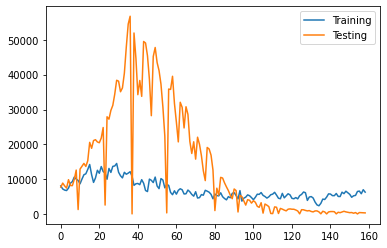

In [43]:
df.plot()
plt.show()



```
# This is formatted as code
```

### Review Data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Training  159 non-null    int64
 1   Testing   159 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


### Split Dataset

In [7]:
train_sets = TimeseriesGenerator(df['Training'], df['Training'], length=4, batch_size=1)
test_sets = TimeseriesGenerator(df['Testing'], df['Testing'], length=4, batch_size=1)

In [8]:
X = []
y = []
for i in range(154):
  xs, ys = train_sets[i]
  X.append(xs[0])
  y.append(ys[0])

In [24]:
df.describe()

,Training,Testing
count,159.000000,159.000000
mean,7082.559748,14057.855346
std,2729.376874,15506.399139
min,2385.000000,46.000000
25%,5185.500000,959.500000
50%,6130.000000,7465.000000
75%,8810.000000,23556.500000
max,14518.000000,56757.000000


In [12]:
df.isnull().sum()

Training    0
Testing     0
dtype: int64

### Create Model

In [9]:
model = LinearRegression().fit(X, y)

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [10]:
model.score(X, y)

0.8487288342248007

In [11]:
for i in range(154):
  xs, ys = test_sets[i]
  print(f'{model.predict(xs)[0]} || {ys[0]}')

7635.1957593883135 || 9868
9430.921119468645 || 8189
8009.63100925062 || 8161
8229.405112346007 || 9944
9599.416718363025 || 12624
11340.400189746908 || 1299
3250.9602834702123 || 12906
12389.806651524363 || 13737
11789.958633278318 || 14536
12481.762224315224 || 13668
13238.612973703137 || 15308
14635.559966712035 || 20574
18442.89186559005 || 18872
17231.127730057335 || 21095
19689.739427110275 || 21342
20227.68072010386 || 20694
19826.812359650314 || 20467
19948.382133058818 || 21807
20879.38211857139 || 24836
22972.60190461493 || 2583
6828.243170249553 || 27913
26116.43305649844 || 27233
22966.193467699093 || 29745
25345.112756889794 || 31189
29124.521705215957 || 34379
31658.11040769941 || 38391
34998.847250114006 || 38124
35295.37534690596 || 35094
33925.4288097681 || 36197
35187.705586878765 || 40427
37867.71748987081 || 47899
43057.811154178264 || 54517
48420.013002983906 || 56757
51336.95650371229 || 54
11556.784713595316 || 51952
51180.16963548647 || 44721
38691.1765587298 ||